In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score # AUC score
from sklearn.metrics import average_precision_score # AUPR score
from sklearn.metrics import precision_recall_fscore_support # precision, recall
from imblearn.metrics import sensitivity_specificity_support # sensitivity, specificity
from sklearn.metrics import roc_curve # to draw auc curve
from sklearn.metrics import precision_recall_curve # to draw aupr curve
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [4]:
gold_pos = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/gold_pos_desc12.tsv")
gold_neg = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/gold_neg_desc12.tsv")
gold = pd.concat([gold_pos, gold_neg])
x_whole_data = gold[gold.columns.values[3:].tolist()].values
y_whole_data = gold["association"].values

In [6]:
indep = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/data/desc_12/indep_desc12.tsv")
indep_x = indep.values[:, 3:].astype(float)
indep_y = indep.values[:,2].astype(int)

In [7]:
# undersampler
rus = RandomUnderSampler(ratio=0.5)

In [8]:
x_rs = list()
y_rs = list()
for i in range(30):
    x_resampled, y_resampled = rus.fit_sample(x_whole_data, y_whole_data)
    x_rs.append(x_resampled)
    y_rs.append(y_resampled)

In [13]:
#[True,True,True,True,True,True,True,True,True,True,True,True]
x_features = list()
for x_resampled in x_rs:
    x_f1 = x_resampled[:,[False,True,True,True,True,True,True,True,True,True,True,True]]
    x_f2 = x_resampled[:,[True,False,True,True,True,True,True,True,True,True,True,True]]
    x_f3 = x_resampled[:,[True,True,False,True,True,True,True,True,True,True,True,True]]
    x_f4 = x_resampled[:,[True,True,True,False,True,True,True,True,True,True,True,True]]
    x_f5 = x_resampled[:,[True,True,True,True,False,True,True,True,True,True,True,True]]
    x_f6 = x_resampled[:,[True,True,True,True,True,False,True,True,True,True,True,True]]
    x_f7 = x_resampled[:,[True,True,True,True,True,True,False,True,True,True,True,True]]
    x_f8 = x_resampled[:,[True,True,True,True,True,True,True,False,True,True,True,True]]
    x_f9 = x_resampled[:,[True,True,True,True,True,True,True,True,False,True,True,True]]
    x_f10 = x_resampled[:,[True,True,True,True,True,True,True,True,True,False,True,True]]
    x_f11 = x_resampled[:,[True,True,True,True,True,True,True,True,True,True,False,True]]
    x_f12 = x_resampled[:,[True,True,True,True,True,True,True,True,True,True,True, False]]
    #drStr 제외
    x_f13 = x_resampled[:,[False,False,False,True,True,True,True,True,True,True,True,True]]
    #drPhe 제외
    x_f14 = x_resampled[:,[True,True,True,False,False,False,True,True,True,True,True,True]]
    #drGo 제외
    x_f15 = x_resampled[:,[True,True,True,True,True,True,False,False,False,True,True,True]]
    #drTar 제외
    x_f16 = x_resampled[:,[True,True,True,True,True,True,True,True,True,False,False,False]]
    #diGo 제외
    x_f17 = x_resampled[:,[False,True,True,False,True,True,False,True,True,False,True,True]]
    #diHPO 제외
    x_f18 = x_resampled[:,[True,False,True,True,False,True,True,False,True,True,False,True]]
    #diPhe 제외
    x_f19 = x_resampled[:,[True,True,False,True,True,False,True,True,False,True,True,False]]
    # 1, 6, 10 제외 - AUC, acc가 모두 significant
    x_f20 = x_resampled[:,[False,True,True,True,True,False,True,True,True,False,True,True]]
    # 5, 8, 11 제외 - AUC, acc가 모두 unsignificant
    x_f21 = x_resampled[:,[True,True,True,True,False,True,True,False,True,True,False,True]]
    # 1, 3, 6, 10 제외 - acc가 significant
    x_f22 = x_resampled[:,[False,True,False,True,True,False,True,True,True,False,True,True]]
    # 5, 7, 8, 9, 11 제외 - acc가 unsignificant - 둘중 하나라도 unsignificant = significant한걸로만 해봄
    x_f23 = x_resampled[:,[True,True,True,True,False,True,False,False,False,True,False,True]]
    # 1, 2, 4, 6, 10, 12 제외 - auc가 significant
    x_f24 = x_resampled[:,[False,False,True,False,True,False,True,True,True,False,True,False]]
    # 1,2,3,4,6,10,12 제외 - 둘중 하나라도 significant = unsignificant한걸로만 해봄.
    x_f25 = x_resampled[:,[False,False,False,False,True,False,True,True,True,False,True,False]]
    
    x_features.append((x_resampled, x_f1,x_f2,x_f3,x_f4,x_f5,x_f6,x_f7,x_f8,x_f9,x_f10,
                       x_f11,x_f12,x_f13,x_f14,x_f15,x_f16,x_f17,x_f18,x_f19,x_f20,
                       x_f21,x_f22,x_f23,x_f24,x_f25))

In [9]:
indep1 = indep_x[:, [False,True,True,True,True,True,True,True,True,True,True,True]]
indep2 = indep_x[:, [True,False,True,True,True,True,True,True,True,True,True,True]]
indep3 = indep_x[:, [True,True,False,True,True,True,True,True,True,True,True,True]]
indep4 = indep_x[:, [True,True,True,False,True,True,True,True,True,True,True,True]]
indep5 = indep_x[:, [True,True,True,True,False,True,True,True,True,True,True,True]]
indep6 = indep_x[:, [True,True,True,True,True,False,True,True,True,True,True,True]]
indep7 = indep_x[:, [True,True,True,True,True,True,False,True,True,True,True,True]]
indep8 = indep_x[:, [True,True,True,True,True,True,True,False,True,True,True,True]]
indep9 = indep_x[:, [True,True,True,True,True,True,True,True,False,True,True,True]]
indep10 = indep_x[:, [True,True,True,True,True,True,True,True,True,False,True,True]]
indep11 = indep_x[:, [True,True,True,True,True,True,True,True,True,True,False,True]]
indep12 = indep_x[:, [True,True,True,True,True,True,True,True,True,True,True,False]]
indep13 = indep_x[:, [False,False,False,True,True,True,True,True,True,True,True,True]]
indep14 = indep_x[:, [True,True,True,False,False,False,True,True,True,True,True,True]]
indep15 = indep_x[:, [True,True,True,True,True,True,False,False,False,True,True,True]]
indep16 = indep_x[:, [True,True,True,True,True,True,True,True,True,False,False,False]]
indep17 = indep_x[:, [False,True,True,False,True,True,False,True,True,False,True,True]]
indep18 = indep_x[:, [True,False,True,True,False,True,True,False,True,True,False,True]]
indep19 = indep_x[:, [True,True,False,True,True,False,True,True,False,True,True,False]]
indep20 = indep_x[:, [False,True,True,True,True,False,True,True,True,False,True,True]]
indep21 = indep_x[:, [True,True,True,True,False,True,True,False,True,True,False,True]]
indep22 = indep_x[:, [False,True,False,True,True,False,True,True,True,False,True,True]]
indep23 = indep_x[:, [True,True,True,True,False,True,False,False,False,True,False,True]]
indep24 = indep_x[:, [False,False,True,False,True,False,True,True,True,False,True,False]]
indep25 = indep_x[:, [False,False,False,False,True,False,True,True,True,False,True,False]]

In [39]:
# training, validation index 고정
tridxs = dict()
vaidxs = dict()
skf = StratifiedKFold(n_splits=10, shuffle=True)
for x, y, i in zip(x_features, y_rs, range(30)):
    tridx = list()
    vaidx = list()
    for tr, va in skf.split(x[0], y_resampled):
        tridx.append(tr)
        vaidx.append(va)
    tridxs[i] = tridx 
    vaidxs[i] = vaidx

In [37]:
print len(x_features)
print len(x_features[0])

30
26


2017-06-05 23:23:35
start : 2017-06-05 23:23:35
0 trials2017-06-05 23:23:35
    start : 0 trials, f0_features 2017-06-05 23:23:35
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f0_features 2017-06-05 23:26:12
    start : 0 trials, f1_features 2017-06-05 23:26:12
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f1_features 2017-06-05 23:28:49
    start : 0 trials, f2_features 2017-06-05 23:28:49
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f2_features 2017-06-05 23:31:27
   

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1200------------------------------------
    end : 0 trials, f3_features 2017-06-05 23:34:06
    start : 0 trials, f4_features 2017-06-05 23:34:06
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f4_features 2017-06-05 23:36:44
    start : 0 trials, f5_features 2017-06-05 23:36:44
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f5_features 2017-06-05 23:39:22
    start : 0 trials, f6_features 2017-06-05 23:39:22
120------------------------------------
300------------------------------------
500------------------------------------
800------------------------------------
1200------------------------------------
    end : 0 trials, f6_features 2017-0

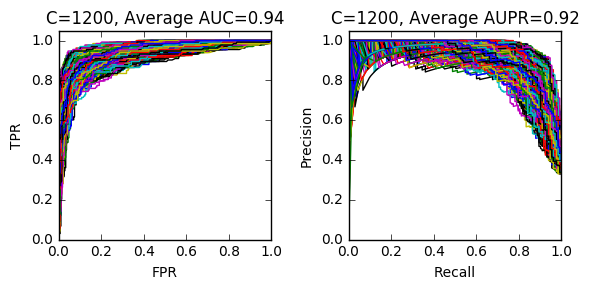

In [81]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
rf = Trial()
rf.param={'c':0, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
rf.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
rf.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
rf.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
df = pd.DataFrame()
print "start : "+datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for x_rs, y_resampled, trial in zip(x_features, y_rs, range(30)):
    print "{} trials".format(trial) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    rf.param['key'] = trial
    for x_resampled, f_num in zip(x_rs[:20], range(len(x_rs))):
        print "    start : {} trials, f{}_features ".format(trial, f_num) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        for user_c in [120,300,500,800,1200]:
            rf.param['c'] = user_c
            rf.folds_results, rf.draw_results = rf.Random_Forest_K_fold_graph(x_resampled, y_resampled, rf.param)
            rf.avg_result = rf.average_result(rf.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
            rf.param_results[user_c].append(rf.avg_result) # parameter 별로 indepedent 결과 저장한다.
            rf.draw_total[user_c].append(rf.draw_results)
        for user_c in [120,300,500,800,1200]:
            rf.indep_results = rf.independent_results(rf.param_results[user_c])
            rf.final_param_results[user_c] = rf.final_results(rf.indep_results)
            rf.draw_plot(rf.draw_total[user_c],rf.final_param_results[user_c], user_c, path, str(200+trial)+'_RF_f'+str(f_num)+'_desc_training_'+str(user_c)+'.png')
            temp_df = pd.DataFrame(data = [[trial, f_num, user_c, 
                               rf.final_param_results[user_c]['acc'],
                               rf.final_param_results[user_c]['auc'],
                               rf.final_param_results[user_c]['aupr'],
                               rf.final_param_results[user_c]['precision'],
                               rf.final_param_results[user_c]['recall'],
                               rf.final_param_results[user_c]['sn'][1],
                               rf.final_param_results[user_c]['sp'][1],
                               rf.final_param_results[user_c]['confusion_matrix']]],
                        columns = ['Trials', 'Feature_num', 'N', 'Acc', 'AUC', 'AUPR', 'Precision', 'Recall', 'Sn', 'Sp', 'Conf'])
            df = df.append(temp_df)
        print "    end : {} trials, f{}_features ".format(trial, f_num) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print "end : {} trials".format(trial) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [83]:
df.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/226_RF_f1_f19_desc_training.txt")

In [34]:
rf.param['tridxs']

{29: [array([   0,    1,    2, ..., 3986, 3987, 3988]),
  array([   1,    2,    3, ..., 3987, 3988, 3989]),
  array([   0,    1,    2, ..., 3987, 3988, 3989]),
  array([   0,    1,    2, ..., 3987, 3988, 3989]),
  array([   0,    1,    2, ..., 3987, 3988, 3989]),
  array([   0,    2,    3, ..., 3987, 3988, 3989]),
  array([   0,    1,    3, ..., 3985, 3987, 3989]),
  array([   0,    1,    2, ..., 3986, 3988, 3989]),
  array([   0,    1,    2, ..., 3987, 3988, 3989]),
  array([   0,    1,    2, ..., 3987, 3988, 3989])]}

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
all = Trial()
#all.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
all.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
all.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
all.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
all.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "200_RF_all_desc_training.txt", 'w') as fd :
    for x_resampled, y_resampled in zip(x_features, y_rs):
        all.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                all.param['c'] = user_c
                all.folds_results, all.draw_results = all.Random_Forest_K_fold_graph(x_resampled, y_resampled, all.param)
                all.avg_result = all.average_result(all.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                all.param_results[user_c].append(all.avg_result) # parameter 별로 indepedent 결과 저장한다.
                all.draw_total[user_c].append(all.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        all.indep_results = all.independent_results(all.param_results[user_c])
        all.final_param_results[user_c] = all.final_results(all.indep_results)
        all.draw_plot(all.draw_total[user_c],all.final_param_results[user_c], user_c)
        all.write_output(fd, all.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
all = Trial()
all.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10}

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23. #2017.6.2.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "200_RF_all_desc_indep.txt", 'w') as fd :
    user_c = 800
    all.param['c']=user_c
    fd.write("<independent>\r\n")
    all.indep_folds_results, all.indep_draw_results = all.Random_Forest_independent_graph(x_resampled, y_resampled, indep_x, indep_y, all.param)
    all.draw_plot([all.indep_draw_results], all.indep_folds_results, user_c)
    all.write_output(fd, all.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f1 = Trial()
#f1.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f1.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f1.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f1.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f1.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "201_RF_f1_desc_training.txt", 'w') as fd :
    for key in range(10):
        f1.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f1.param['c'] = user_c
                f1.folds_results, f1.draw_results = f1.Random_Forest_K_fold_graph(x_f1, y_resampled, f1.param)
                f1.avg_result = f1.average_result(f1.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f1.param_results[user_c].append(f1.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f1.draw_total[user_c].append(f1.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f1.indep_results = f1.independent_results(f1.param_results[user_c])
        f1.final_param_results[user_c] = f1.final_results(f1.indep_results)
        f1.draw_plot(f1.draw_total[user_c],f1.final_param_results[user_c], user_c)
        f1.write_output(fd, f1.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "201_RF_f1_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f1.param['c']=user_c
    fd.write("<independent>\r\n")
    f1.indep_folds_results, f1.indep_draw_results = f1.Random_Forest_independent_graph(x_f1, y_resampled, indep1, indep_y, f1.param)
    f1.draw_plot([f1.indep_draw_results], f1.indep_folds_results, user_c)
    f1.write_output(fd, f1.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f2 = Trial()
#f2.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f2.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f2.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f2.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f2.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "202_RF_f2_desc_training.txt", 'w') as fd :
    for key in range(10):
        f2.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f2.param['c'] = user_c
                f2.folds_results, f2.draw_results = f2.Random_Forest_K_fold_graph(x_f2, y_resampled, f2.param)
                f2.avg_result = f2.average_result(f2.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f2.param_results[user_c].append(f2.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f2.draw_total[user_c].append(f2.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f2.indep_results = f2.independent_results(f2.param_results[user_c])
        f2.final_param_results[user_c] = f2.final_results(f2.indep_results)
        f2.draw_plot(f2.draw_total[user_c],f2.final_param_results[user_c], user_c)
        f2.write_output(fd, f2.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "202_RF_f2_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f2.param['c']=user_c
    fd.write("<independent>\r\n")
    f2.indep_folds_results, f2.indep_draw_results = f2.Random_Forest_independent_graph(x_f2, y_resampled, indep2, indep_y, f2.param)
    f2.draw_plot([f2.indep_draw_results], f2.indep_folds_results, user_c)
    f2.write_output(fd, f2.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f3 = Trial()
#f3.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f3.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f3.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f3.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f3.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "203_RF_f3_desc_training.txt", 'w') as fd :
    for key in range(10):
        f3.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f3.param['c'] = user_c
                f3.folds_results, f3.draw_results = f3.Random_Forest_K_fold_graph(x_f3, y_resampled, f3.param)
                f3.avg_result = f3.average_result(f3.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f3.param_results[user_c].append(f3.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f3.draw_total[user_c].append(f3.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f3.indep_results = f3.independent_results(f3.param_results[user_c])
        f3.final_param_results[user_c] = f3.final_results(f3.indep_results)
        f3.draw_plot(f3.draw_total[user_c],f3.final_param_results[user_c], user_c)
        f3.write_output(fd, f3.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "203_RF_f3_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f3.param['c']=user_c
    fd.write("<independent>\r\n")
    f3.indep_folds_results, f3.indep_draw_results = f3.Random_Forest_independent_graph(x_f3, y_resampled, indep3, indep_y, f3.param)
    f3.draw_plot([f3.indep_draw_results], f3.indep_folds_results, user_c)
    f3.write_output(fd, f3.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f4 = Trial()
#f4.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f4.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f4.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f4.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f4.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "204_RF_f4_desc_training.txt", 'w') as fd :
    for key in range(10):
        f4.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f4.param['c'] = user_c
                f4.folds_results, f4.draw_results = f4.Random_Forest_K_fold_graph(x_f4, y_resampled, f4.param)
                f4.avg_result = f4.average_result(f4.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f4.param_results[user_c].append(f4.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f4.draw_total[user_c].append(f4.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f4.indep_results = f4.independent_results(f4.param_results[user_c])
        f4.final_param_results[user_c] = f4.final_results(f4.indep_results)
        f4.draw_plot(f4.draw_total[user_c],f4.final_param_results[user_c], user_c)
        f4.write_output(fd, f4.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "204_RF_f4_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f4.param['c']=user_c
    fd.write("<independent>\r\n")
    f4.indep_folds_results, f4.indep_draw_results = f4.Random_Forest_independent_graph(x_f4, y_resampled, indep4, indep_y, f4.param)
    f4.draw_plot([f4.indep_draw_results], f4.indep_folds_results, user_c)
    f4.write_output(fd, f4.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f5 = Trial()
#f5.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f5.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f5.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f5.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f5.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "205_RF_f5_desc_training.txt", 'w') as fd :
    for key in range(10):
        f5.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f5.param['c'] = user_c
                f5.folds_results, f5.draw_results = f5.Random_Forest_K_fold_graph(x_f5, y_resampled, f5.param)
                f5.avg_result = f5.average_result(f5.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f5.param_results[user_c].append(f5.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f5.draw_total[user_c].append(f5.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f5.indep_results = f5.independent_results(f5.param_results[user_c])
        f5.final_param_results[user_c] = f5.final_results(f5.indep_results)
        f5.draw_plot(f5.draw_total[user_c],f5.final_param_results[user_c], user_c)
        f5.write_output(fd, f5.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "205_RF_f5_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f5.param['c']=user_c
    fd.write("<independent>\r\n")
    f5.indep_folds_results, f5.indep_draw_results = f5.Random_Forest_independent_graph(x_f5, y_resampled, indep5, indep_y, f5.param)
    f5.draw_plot([f5.indep_draw_results], f5.indep_folds_results, user_c)
    f5.write_output(fd, f5.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f6 = Trial()
#f6.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f6.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f6.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f6.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f6.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "206_RF_f6_desc_training.txt", 'w') as fd :
    for key in range(10):
        f6.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f6.param['c'] = user_c
                f6.folds_results, f6.draw_results = f6.Random_Forest_K_fold_graph(x_f6, y_resampled, f6.param)
                f6.avg_result = f6.average_result(f6.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f6.param_results[user_c].append(f6.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f6.draw_total[user_c].append(f6.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f6.indep_results = f6.independent_results(f6.param_results[user_c])
        f6.final_param_results[user_c] = f6.final_results(f6.indep_results)
        f6.draw_plot(f6.draw_total[user_c],f6.final_param_results[user_c], user_c)
        f6.write_output(fd, f6.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "206_RF_f6_desc_indep.txt", 'w') as fd :
    user_c = 500
    f6.param['c']=user_c
    fd.write("<independent>\r\n")
    f6.indep_folds_results, f6.indep_draw_results = f6.Random_Forest_independent_graph(x_f6, y_resampled, indep6, indep_y, f6.param)
    f6.draw_plot([f6.indep_draw_results], f6.indep_folds_results, user_c)
    f6.write_output(fd, f6.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f7 = Trial()
#f7.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f7.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f7.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f7.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f7.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "207_RF_f7_desc_training.txt", 'w') as fd :
    for key in range(10):
        f7.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f7.param['c'] = user_c
                f7.folds_results, f7.draw_results = f7.Random_Forest_K_fold_graph(x_f7, y_resampled, f7.param)
                f7.avg_result = f7.average_result(f7.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f7.param_results[user_c].append(f7.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f7.draw_total[user_c].append(f7.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f7.indep_results = f7.independent_results(f7.param_results[user_c])
        f7.final_param_results[user_c] = f7.final_results(f7.indep_results)
        f7.draw_plot(f7.draw_total[user_c],f7.final_param_results[user_c], user_c)
        f7.write_output(fd, f7.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "207_RF_f7_desc_indep.txt", 'w') as fd :
    user_c = 800
    f7.param['c']=user_c
    fd.write("<independent>\r\n")
    f7.indep_folds_results, f7.indep_draw_results = f7.Random_Forest_independent_graph(x_f7, y_resampled, indep7, indep_y, f7.param)
    f7.draw_plot([f7.indep_draw_results], f7.indep_folds_results, user_c)
    f7.write_output(fd, f7.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f8 = Trial()
#f8.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f8.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f8.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f8.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f8.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "208_RF_f8_desc_training.txt", 'w') as fd :
    for key in range(10):
        f8.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f8.param['c'] = user_c
                f8.folds_results, f8.draw_results = f8.Random_Forest_K_fold_graph(x_f8, y_resampled, f8.param)
                f8.avg_result = f8.average_result(f8.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f8.param_results[user_c].append(f8.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f8.draw_total[user_c].append(f8.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f8.indep_results = f8.independent_results(f8.param_results[user_c])
        f8.final_param_results[user_c] = f8.final_results(f8.indep_results)
        f8.draw_plot(f8.draw_total[user_c],f8.final_param_results[user_c], user_c)
        f8.write_output(fd, f8.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "208_RF_f8_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f8.param['c']=user_c
    fd.write("<independent>\r\n")
    f8.indep_folds_results, f8.indep_draw_results = f8.Random_Forest_independent_graph(x_f8, y_resampled, indep8, indep_y, f8.param)
    f8.draw_plot([f8.indep_draw_results], f8.indep_folds_results, user_c)
    f8.write_output(fd, f8.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f9 = Trial()
#f9.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f9.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f9.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f9.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f9.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "209_RF_f9_desc_training.txt", 'w') as fd :
    for key in range(10):
        f9.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f9.param['c'] = user_c
                f9.folds_results, f9.draw_results = f9.Random_Forest_K_fold_graph(x_f9, y_resampled, f9.param)
                f9.avg_result = f9.average_result(f9.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f9.param_results[user_c].append(f9.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f9.draw_total[user_c].append(f9.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f9.indep_results = f9.independent_results(f9.param_results[user_c])
        f9.final_param_results[user_c] = f9.final_results(f9.indep_results)
        f9.draw_plot(f9.draw_total[user_c],f9.final_param_results[user_c], user_c)
        f9.write_output(fd, f9.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "209_RF_f9_desc_indep.txt", 'w') as fd :
    user_c = 800
    f9.param['c']=user_c
    fd.write("<independent>\r\n")
    f9.indep_folds_results, f9.indep_draw_results = f9.Random_Forest_independent_graph(x_f9, y_resampled, indep9, indep_y, f9.param)
    f9.draw_plot([f9.indep_draw_results], f9.indep_folds_results, user_c)
    f9.write_output(fd, f9.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f10 = Trial()
#f10.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f10.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f10.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f10.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f10.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "210_RF_f10_desc_training.txt", 'w') as fd :
    for key in range(10):
        f10.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f10.param['c'] = user_c
                f10.folds_results, f10.draw_results = f10.Random_Forest_K_fold_graph(x_f10, y_resampled, f10.param)
                f10.avg_result = f10.average_result(f10.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f10.param_results[user_c].append(f10.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f10.draw_total[user_c].append(f10.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f10.indep_results = f10.independent_results(f10.param_results[user_c])
        f10.final_param_results[user_c] = f10.final_results(f10.indep_results)
        f10.draw_plot(f10.draw_total[user_c],f10.final_param_results[user_c], user_c)
        f10.write_output(fd, f10.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "210_RF_f10_desc_indep.txt", 'w') as fd :
    user_c = 800
    f10.param['c']=user_c
    fd.write("<independent>\r\n")
    f10.indep_folds_results, f10.indep_draw_results = f10.Random_Forest_independent_graph(x_f10, y_resampled, indep10, indep_y, f10.param)
    f10.draw_plot([f10.indep_draw_results], f10.indep_folds_results, user_c)
    f10.write_output(fd, f10.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f11 = Trial()
#f11.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f11.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f11.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f11.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f11.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "211_RF_f11_desc_training.txt", 'w') as fd :
    for key in range(10):
        f11.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f11.param['c'] = user_c
                f11.folds_results, f11.draw_results = f11.Random_Forest_K_fold_graph(x_f11, y_resampled, f11.param)
                f11.avg_result = f11.average_result(f11.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f11.param_results[user_c].append(f11.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f11.draw_total[user_c].append(f11.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f11.indep_results = f11.independent_results(f11.param_results[user_c])
        f11.final_param_results[user_c] = f11.final_results(f11.indep_results)
        f11.draw_plot(f11.draw_total[user_c],f11.final_param_results[user_c], user_c)
        f11.write_output(fd, f11.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "211_RF_f11_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f11.param['c']=user_c
    fd.write("<independent>\r\n")
    f11.indep_folds_results, f11.indep_draw_results = f11.Random_Forest_independent_graph(x_f11, y_resampled, indep11, indep_y, f11.param)
    f11.draw_plot([f11.indep_draw_results], f11.indep_folds_results, user_c)
    f11.write_output(fd, f11.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f12 = Trial()
#f12.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f12.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f12.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f12.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f12.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "212_RF_f12_desc_training.txt", 'w') as fd :
    for key in range(10):
        f12.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f12.param['c'] = user_c
                f12.folds_results, f12.draw_results = f12.Random_Forest_K_fold_graph(x_f12, y_resampled, f12.param)
                f12.avg_result = f12.average_result(f12.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f12.param_results[user_c].append(f12.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f12.draw_total[user_c].append(f12.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f12.indep_results = f12.independent_results(f12.param_results[user_c])
        f12.final_param_results[user_c] = f12.final_results(f12.indep_results)
        f12.draw_plot(f12.draw_total[user_c],f12.final_param_results[user_c], user_c)
        f12.write_output(fd, f12.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "212_RF_f12_desc_indep.txt", 'w') as fd :
    user_c = 500
    f12.param['c']=user_c
    fd.write("<independent>\r\n")
    f12.indep_folds_results, f12.indep_draw_results = f12.Random_Forest_independent_graph(x_f12, y_resampled, indep12, indep_y, f12.param)
    f12.draw_plot([f12.indep_draw_results], f12.indep_folds_results, user_c)
    f12.write_output(fd, f12.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
#[True,True,True,True,True,True,True,True,True,True,True,True]
#drStr 제외
x_f13 = x_resampled[:,[False,False,False,True,True,True,True,True,True,True,True,True]]
indep13 = indep_x[:, [False,False,False,True,True,True,True,True,True,True,True,True]]
#drPhe 제외
x_f14 = x_resampled[:,[True,True,True,False,False,False,True,True,True,True,True,True]]
indep14 = indep_x[:, [True,True,True,False,False,False,True,True,True,True,True,True]]
#drGo 제외
x_f15 = x_resampled[:,[True,True,True,True,True,True,False,False,False,True,True,True]]
indep15 = indep_x[:, [True,True,True,True,True,True,False,False,False,True,True,True]]
#drTar 제외
x_f16 = x_resampled[:,[True,True,True,True,True,True,True,True,True,False,False,False]]
indep16 = indep_x[:, [True,True,True,True,True,True,True,True,True,False,False,False]]
#diGo 제외
x_f17 = x_resampled[:,[False,True,True,False,True,True,False,True,True,False,True,True]]
indep17 = indep_x[:, [False,True,True,False,True,True,False,True,True,False,True,True]]
#diHPO 제외
x_f18 = x_resampled[:,[True,False,True,True,False,True,True,False,True,True,False,True]]
indep18 = indep_x[:, [True,False,True,True,False,True,True,False,True,True,False,True]]
#diPhe 제외
x_f19 = x_resampled[:,[True,True,False,True,True,False,True,True,False,True,True,False]]
indep19 = indep_x[:, [True,True,False,True,True,False,True,True,False,True,True,False]]

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f13 = Trial()
#f13.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f13.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f13.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f13.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f13.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "213_RF_f13_desc_training.txt", 'w') as fd :
    for key in range(10):
        f13.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f13.param['c'] = user_c
                f13.folds_results, f13.draw_results = f13.Random_Forest_K_fold_graph(x_f13, y_resampled, f13.param)
                f13.avg_result = f13.average_result(f13.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f13.param_results[user_c].append(f13.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f13.draw_total[user_c].append(f13.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f13.indep_results = f13.independent_results(f13.param_results[user_c])
        f13.final_param_results[user_c] = f13.final_results(f13.indep_results)
        f13.draw_plot(f13.draw_total[user_c],f13.final_param_results[user_c], user_c)
        f13.write_output(fd, f13.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "213_RF_f13_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f13.param['c']=user_c
    fd.write("<independent>\r\n")
    f13.indep_folds_results, f13.indep_draw_results = f13.Random_Forest_independent_graph(x_f13, y_resampled, indep13, indep_y, f13.param)
    f13.draw_plot([f13.indep_draw_results], f13.indep_folds_results, user_c)
    f13.write_output(fd, f13.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f14 = Trial()
#f14.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f14.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f14.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f14.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f14.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "214_RF_f14_desc_training.txt", 'w') as fd :
    for key in range(10):
        f14.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f14.param['c'] = user_c
                f14.folds_results, f14.draw_results = f14.Random_Forest_K_fold_graph(x_f14, y_resampled, f14.param)
                f14.avg_result = f14.average_result(f14.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f14.param_results[user_c].append(f14.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f14.draw_total[user_c].append(f14.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f14.indep_results = f14.independent_results(f14.param_results[user_c])
        f14.final_param_results[user_c] = f14.final_results(f14.indep_results)
        f14.draw_plot(f14.draw_total[user_c],f14.final_param_results[user_c], user_c)
        f14.write_output(fd, f14.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "214_RF_f14_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f14.param['c']=user_c
    fd.write("<independent>\r\n")
    f14.indep_folds_results, f14.indep_draw_results = f14.Random_Forest_independent_graph(x_f14, y_resampled, indep14, indep_y, f14.param)
    f14.draw_plot([f14.indep_draw_results], f14.indep_folds_results, user_c)
    f14.write_output(fd, f14.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f15 = Trial()
#f15.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f15.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f15.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f15.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f15.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "215_RF_f15_desc_training.txt", 'w') as fd :
    for key in range(10):
        f15.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f15.param['c'] = user_c
                f15.folds_results, f15.draw_results = f15.Random_Forest_K_fold_graph(x_f15, y_resampled, f15.param)
                f15.avg_result = f15.average_result(f15.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f15.param_results[user_c].append(f15.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f15.draw_total[user_c].append(f15.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f15.indep_results = f15.independent_results(f15.param_results[user_c])
        f15.final_param_results[user_c] = f15.final_results(f15.indep_results)
        f15.draw_plot(f15.draw_total[user_c],f15.final_param_results[user_c], user_c)
        f15.write_output(fd, f15.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "215_RF_f15_desc_indep.txt", 'w') as fd :
    user_c = 800
    f15.param['c']=user_c
    fd.write("<independent>\r\n")
    f15.indep_folds_results, f15.indep_draw_results = f15.Random_Forest_independent_graph(x_f15, y_resampled, indep15, indep_y, f15.param)
    f15.draw_plot([f15.indep_draw_results], f15.indep_folds_results, user_c)
    f15.write_output(fd, f15.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f16 = Trial()
#f16.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f16.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f16.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f16.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f16.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "216_RF_f16_desc_training.txt", 'w') as fd :
    for key in range(10):
        f16.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f16.param['c'] = user_c
                f16.folds_results, f16.draw_results = f16.Random_Forest_K_fold_graph(x_f16, y_resampled, f16.param)
                f16.avg_result = f16.average_result(f16.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f16.param_results[user_c].append(f16.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f16.draw_total[user_c].append(f16.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f16.indep_results = f16.independent_results(f16.param_results[user_c])
        f16.final_param_results[user_c] = f16.final_results(f16.indep_results)
        f16.draw_plot(f16.draw_total[user_c],f16.final_param_results[user_c], user_c)
        f16.write_output(fd, f16.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "216_RF_f16_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f16.param['c']=user_c
    fd.write("<independent>\r\n")
    f16.indep_folds_results, f16.indep_draw_results = f16.Random_Forest_independent_graph(x_f16, y_resampled, indep16, indep_y, f16.param)
    f16.draw_plot([f16.indep_draw_results], f16.indep_folds_results, user_c)
    f16.write_output(fd, f16.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f17 = Trial()
#f17.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f17.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f17.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f17.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f17.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "217_RF_f17_desc_training.txt", 'w') as fd :
    for key in range(10):
        f17.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f17.param['c'] = user_c
                f17.folds_results, f17.draw_results = f17.Random_Forest_K_fold_graph(x_f17, y_resampled, f17.param)
                f17.avg_result = f17.average_result(f17.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f17.param_results[user_c].append(f17.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f17.draw_total[user_c].append(f17.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f17.indep_results = f17.independent_results(f17.param_results[user_c])
        f17.final_param_results[user_c] = f17.final_results(f17.indep_results)
        f17.draw_plot(f17.draw_total[user_c],f17.final_param_results[user_c], user_c)
        f17.write_output(fd, f17.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "217_RF_f17_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f17.param['c']=user_c
    fd.write("<independent>\r\n")
    f17.indep_folds_results, f17.indep_draw_results = f17.Random_Forest_independent_graph(x_f17, y_resampled, indep17, indep_y, f17.param)
    f17.draw_plot([f17.indep_draw_results], f17.indep_folds_results, user_c)
    f17.write_output(fd, f17.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f18 = Trial()
#f18.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f18.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f18.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f18.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f18.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "218_RF_f18_desc_training.txt", 'w') as fd :
    for key in range(10):
        f18.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f18.param['c'] = user_c
                f18.folds_results, f18.draw_results = f18.Random_Forest_K_fold_graph(x_f18, y_resampled, f18.param)
                f18.avg_result = f18.average_result(f18.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f18.param_results[user_c].append(f18.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f18.draw_total[user_c].append(f18.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f18.indep_results = f18.independent_results(f18.param_results[user_c])
        f18.final_param_results[user_c] = f18.final_results(f18.indep_results)
        f18.draw_plot(f18.draw_total[user_c],f18.final_param_results[user_c], user_c)
        f18.write_output(fd, f18.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "218_RF_f18_desc_indep.txt", 'w') as fd :
    user_c = 1200
    f18.param['c']=user_c
    fd.write("<independent>\r\n")
    f18.indep_folds_results, f18.indep_draw_results = f18.Random_Forest_independent_graph(x_f18, y_resampled, indep18, indep_y, f18.param)
    f18.draw_plot([f18.indep_draw_results], f18.indep_folds_results, user_c)
    f18.write_output(fd, f18.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.4.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f19 = Trial()
#f19.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f19.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f19.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f19.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f19.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "219_RF_f19_desc_training.txt", 'w') as fd :
    for key in range(10):
        f19.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f19.param['c'] = user_c
                f19.folds_results, f19.draw_results = f19.Random_Forest_K_fold_graph(x_f19, y_resampled, f19.param)
                f19.avg_result = f19.average_result(f19.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f19.param_results[user_c].append(f19.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f19.draw_total[user_c].append(f19.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f19.indep_results = f19.independent_results(f19.param_results[user_c])
        f19.final_param_results[user_c] = f19.final_results(f19.indep_results)
        f19.draw_plot(f19.draw_total[user_c],f19.final_param_results[user_c], user_c)
        f19.write_output(fd, f19.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Independent SVM_K_fold_grpah + 파일 입출력 2017.5.23.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "219_RF_f19_desc_indep.txt", 'w') as fd :
    user_c = 800
    f19.param['c']=user_c
    fd.write("<independent>\r\n")
    f19.indep_folds_results, f19.indep_draw_results = f19.Random_Forest_independent_graph(x_f19, y_resampled, indep19, indep_y, f19.param)
    f19.draw_plot([f19.indep_draw_results], f19.indep_folds_results, user_c)
    f19.write_output(fd, f19.indep_folds_results, user_c)
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f20 = Trial()
#f20.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f20.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f20.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f20.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f20.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "220_RF_f20_desc_training.txt", 'w') as fd :
    for key in range(10):
        f20.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f20.param['c'] = user_c
                f20.folds_results, f20.draw_results = f20.Random_Forest_K_fold_graph(x_f20, y_resampled, f20.param)
                f20.avg_result = f20.average_result(f20.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f20.param_results[user_c].append(f20.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f20.draw_total[user_c].append(f20.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f20.indep_results = f20.independent_results(f20.param_results[user_c])
        f20.final_param_results[user_c] = f20.final_results(f20.indep_results)
        f20.draw_plot(f20.draw_total[user_c],f20.final_param_results[user_c], user_c)
        f20.write_output(fd, f20.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f21 = Trial()
#f21.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f21.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f21.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f21.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f21.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "221_RF_f21_desc_training.txt", 'w') as fd :
    for key in range(10):
        f21.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f21.param['c'] = user_c
                f21.folds_results, f21.draw_results = f21.Random_Forest_K_fold_graph(x_f21, y_resampled, f21.param)
                f21.avg_result = f21.average_result(f21.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f21.param_results[user_c].append(f21.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f21.draw_total[user_c].append(f21.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f21.indep_results = f21.independent_results(f21.param_results[user_c])
        f21.final_param_results[user_c] = f21.final_results(f21.indep_results)
        f21.draw_plot(f21.draw_total[user_c],f21.final_param_results[user_c], user_c)
        f21.write_output(fd, f21.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f22 = Trial()
#f22.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f22.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f22.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f22.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f22.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "221_RF_f22_desc_training.txt", 'w') as fd :
    for key in range(10):
        f22.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f22.param['c'] = user_c
                f22.folds_results, f22.draw_results = f22.Random_Forest_K_fold_graph(x_f22, y_resampled, f22.param)
                f22.avg_result = f22.average_result(f22.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f22.param_results[user_c].append(f22.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f22.draw_total[user_c].append(f22.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f22.indep_results = f22.independent_results(f22.param_results[user_c])
        f22.final_param_results[user_c] = f22.final_results(f22.indep_results)
        f22.draw_plot(f22.draw_total[user_c],f22.final_param_results[user_c], user_c)
        f22.write_output(fd, f22.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f23 = Trial()
#f23.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f23.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f23.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f23.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f23.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "223_RF_f23_desc_training.txt", 'w') as fd :
    for key in range(10):
        f23.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f23.param['c'] = user_c
                f23.folds_results, f23.draw_results = f23.Random_Forest_K_fold_graph(x_f23, y_resampled, f23.param)
                f23.avg_result = f23.average_result(f23.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f23.param_results[user_c].append(f23.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f23.draw_total[user_c].append(f23.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f23.indep_results = f23.independent_results(f23.param_results[user_c])
        f23.final_param_results[user_c] = f23.final_results(f23.indep_results)
        f23.draw_plot(f23.draw_total[user_c],f23.final_param_results[user_c], user_c)
        f23.write_output(fd, f23.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f24 = Trial()
#f24.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f24.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f24.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f24.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f24.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "224_RF_f24_desc_training.txt", 'w') as fd :
    for key in range(10):
        f24.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f24.param['c'] = user_c
                f24.folds_results, f24.draw_results = f24.Random_Forest_K_fold_graph(x_f24, y_resampled, f24.param)
                f24.avg_result = f24.average_result(f24.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f24.param_results[user_c].append(f24.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f24.draw_total[user_c].append(f24.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f24.indep_results = f24.independent_results(f24.param_results[user_c])
        f24.final_param_results[user_c] = f24.final_results(f24.indep_results)
        f24.draw_plot(f24.draw_total[user_c],f24.final_param_results[user_c], user_c)
        f24.write_output(fd, f24.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Random_Forest_K_fold_grpah + 파일 입출력 2017.6.5.
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
f25 = Trial()
#f25.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridx' : tridx, 'vaidx' : vaidx}
f25.param={'c':0, 'kernel' : 'poly', 'degree' : 2, 'k' : 10, 'tridxs' : tridxs, 'vaidxs' : vaidxs}
f25.param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f25.draw_total = {120:[], 300:[], 500:[], 800:[], 1200:[]}
f25.final_param_results = {120:[], 300:[], 500:[], 800:[], 1200:[]}
path = '/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/8_new_training/7_non/features_30/'
with open(path + "225_RF_f25_desc_training.txt", 'w') as fd :
    for key in range(10):
        f25.param['key'] = key
        for user_c in [120,300,500,800,1200]:
                f25.param['c'] = user_c
                f25.folds_results, f25.draw_results = f25.Random_Forest_K_fold_graph(x_f25, y_resampled, f25.param)
                f25.avg_result = f25.average_result(f25.folds_results) # parameter 별로 K-fold한 결과와 average를 구한다.
                f25.param_results[user_c].append(f25.avg_result) # parameter 별로 indepedent 결과 저장한다.
                f25.draw_total[user_c].append(f25.draw_results)

    for user_c in [120,300,500,800,1200]: #independent 결과를 parameter별로 평균 낸다.
        f25.indep_results = f25.independent_results(f25.param_results[user_c])
        f25.final_param_results[user_c] = f25.final_results(f25.indep_results)
        f25.draw_plot(f25.draw_total[user_c],f25.final_param_results[user_c], user_c)
        f25.write_output(fd, f25.final_param_results[user_c], user_c)
    print datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [16]:
class Trial :
  
    def Random_Forest_K_fold_graph(self, X, y, user_parameter):
    
        #skf = StratifiedKFold(n_splits=user_parameter['k'], shuffle=True) # n_splits = k (k fold라서.), pos:neg의 비율을 고려해서 k 개의 subgroup으로 나누어줌.
        folds_results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[], 'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}
        #for training_index, validation_index in skf.split(X, y):
                    
        #for training_index, validation_index in zip(user_parameter['tridx'], user_parameter['vaidx']):
        for training_index, validation_index in zip(user_parameter['tridxs'][user_parameter['key']], user_parameter['vaidxs'][user_parameter['key']]):
            x_training_set = X[training_index]
            y_training_set = y[training_index]
            x_validation_set = X[validation_index]
            y_validation_set = y[validation_index]

            #classifier = SVC(C=user_parameter['c'], kernel= user_parameter['kernel'], degree=user_parameter['degree'], probability=True, cache_size=1000) #n_jobs=-1 이면 모든 node 쓰는것, 신경쓰이면 30개 정도.
            classifier = RandomForestClassifier(n_estimators=user_parameter['c'], n_jobs=-1, class_weight='balanced')
            classifier.fit(x_training_set, y_training_set)

            y_predicted_proba = classifier.predict_proba(x_validation_set) # [0에 대한 확률, 1에 대한 확률], shpae = [n_samples, n_class]
            y_predicted_label = classifier.predict(x_validation_set) # 예측된 label을 보여줌, shpae = [n_samples]

            # Accuracy 
            current_acc = classifier.score(x_validation_set, y_validation_set)
            folds_results['acc'].append(current_acc)

            # AUC
            current_auc = roc_auc_score(y_validation_set, y_predicted_proba[:,1])
            folds_results['auc'].append(current_auc)

            # Sensitivity, Specificity
            sn, sp, support = sensitivity_specificity_support(y_validation_set, y_predicted_label)
            folds_results['sn'].append(sn)
            folds_results['sp'].append(sp)

            # AUPR
            current_aupr = average_precision_score(y_validation_set, y_predicted_proba[:,1])
            folds_results['aupr'].append(current_aupr)

            # Precision, Recall
            precision, recall, _, _ =  precision_recall_fscore_support(y_validation_set, y_predicted_label, average = 'binary')
            folds_results['precision'].append(precision)
            folds_results['recall'].append(recall)

            # Confusion Matrix
            current_confusion_matrix = confusion_matrix(y_validation_set,y_predicted_label)
            folds_results['confusion_matrix'].append(current_confusion_matrix)

            #draw graph
            fpr, tpr, thresholds = roc_curve(y_validation_set, y_predicted_proba[:, 1], pos_label=1)
            draw_results['fpr'].append(fpr)
            draw_results['tpr'].append(tpr)

            precision_vec, recall_vec, _ = precision_recall_curve(y_validation_set, y_predicted_proba[:, 1])
            draw_results['precision_vec'].append(precision_vec)
            draw_results['recall_vec'].append(recall_vec)
        
        return folds_results, draw_results

    def draw_plot(self, draw_results, final_result, user_c, path, filename):
        #colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna'])
        colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'red', 'violet', 'fuchsia', 'sienna']
        lw = 1
        plt.clf()
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
        print "{}------------------------------------".format(user_c)
        for i in draw_results:
            for fpr, tpr in zip(i['fpr'], i['tpr']):
                ax1.plot(fpr, tpr, lw=lw)
            for recall_vec, precision_vec in zip(i['recall_vec'], i['precision_vec']):
                ax2.plot(recall_vec, precision_vec, lw=lw)
        ax1.set_xlabel('FPR')
        ax1.set_ylabel('TPR')
        ax1.set_color_cycle(colors)
        ax1.set_title('C={0}, Average AUC={1:0.2f}'.format(user_c, final_result['auc']))
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlim([0.0, 1.0])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.set_color_cycle(colors)
        ax2.set_title('C={0}, Average AUPR={1:0.2f}'.format(user_c, final_result['aupr']))
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlim([0.0, 1.0])
        plt.tight_layout()
        #plt.show()
        plt.savefig(path + filename)
        
    def average_result(self, folds_results):
        avg_result = dict()
        avg_result['avg_acc'] = sum(folds_results['acc']) / len(folds_results['acc'])
        avg_result['avg_auc'] = sum(folds_results['auc']) / len(folds_results['auc'])
        avg_result['avg_aupr'] = sum(folds_results['aupr']) / len(folds_results['aupr'])
        avg_result['avg_sn'] = sum(folds_results['sn']) / len(folds_results['sn'])
        avg_result['avg_sp'] = sum(folds_results['sp']) / len(folds_results['sp'])
        avg_result['avg_precision'] = sum(folds_results['precision']) / len(folds_results['precision'])
        avg_result['avg_recall'] = sum(folds_results['recall']) / len(folds_results['recall'])
        avg_result['sum_confusion_matrix'] = sum(folds_results['confusion_matrix'])

        return avg_result


    def independent_results(self, param_result):
        indep_results = {'indep_acc':[], 'indep_auc':[], 'indep_aupr':[], 'indep_confusion_matrix':[],
                         'indep_sn':[], 'indep_sp':[], 'indep_precision':[], 'indep_recall':[]}
        for fold in param_result:
            indep_results['indep_acc'].append(fold['avg_acc'])
            indep_results['indep_auc'].append(fold['avg_auc'])
            indep_results['indep_aupr'].append(fold['avg_aupr'])
            indep_results['indep_sn'].append(fold['avg_sn'])
            indep_results['indep_sp'].append(fold['avg_sp'])
            indep_results['indep_precision'].append(fold['avg_precision'])
            indep_results['indep_recall'].append(fold['avg_recall'])
            indep_results['indep_confusion_matrix'].append(fold['sum_confusion_matrix'])
        return indep_results

    def final_results (self, indep_results):
        results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[],
                   'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        results['acc'] = sum(indep_results['indep_acc']) / len(indep_results['indep_acc'])
        results['auc'] = sum(indep_results['indep_auc']) / len(indep_results['indep_auc'])
        results['aupr'] = sum(indep_results['indep_aupr']) / len(indep_results['indep_aupr'])
        results['sn'] = sum(indep_results['indep_sn']) / len(indep_results['indep_sn'])
        results['sp'] = sum(indep_results['indep_sp']) / len(indep_results['indep_sp'])
        results['precision'] = sum(indep_results['indep_precision']) / len(indep_results['indep_precision'])
        results['recall'] = sum(indep_results['indep_recall']) / len(indep_results['indep_recall'])
        results['confusion_matrix'] = sum(indep_results['indep_confusion_matrix'])
        return results

    def final_results (self,indep_results):
        results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[],
                   'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        results['acc'] = sum(indep_results['indep_acc']) / len(indep_results['indep_acc'])
        results['auc'] = sum(indep_results['indep_auc']) / len(indep_results['indep_auc'])
        results['aupr'] = sum(indep_results['indep_aupr']) / len(indep_results['indep_aupr'])
        results['sn'] = sum(indep_results['indep_sn']) / len(indep_results['indep_sn'])
        results['sp'] = sum(indep_results['indep_sp']) / len(indep_results['indep_sp'])
        results['precision'] = sum(indep_results['indep_precision']) / len(indep_results['indep_precision'])
        results['recall'] = sum(indep_results['indep_recall']) / len(indep_results['indep_recall'])
        results['confusion_matrix'] = sum(indep_results['indep_confusion_matrix'])
        return results
    def write_output(self, fd, write_results, user_c):
        fd.write("C={}-------------------------------------------------\r\n".format(user_c))
        fd.write("Accuracy avg : {}\r\n".format(write_results['acc']))
        fd.write("AUC avg : {}\r\n".format(write_results['auc']))
        fd.write("  Sensitivity avg : {}\r\n".format(write_results['sn']))
        fd.write("  Specificity avg : {}\r\n".format(write_results['sp']))
        fd.write("AUPR avg : {}\r\n".format(write_results['aupr']))
        fd.write("  Precision avg : {}\r\n".format(write_results['precision']))
        fd.write("  Recall avg : {}\r\n".format(write_results['recall']))
        fd.write("confusion amtrix : {}\r\n".format(write_results['confusion_matrix']))
        
        
        
    def Random_Forest_independent_graph(self, X, y, indep_X, indep_y, param):

        folds_results = dict()
        draw_results = {'fpr':[], 'tpr':[], 'precision_vec':[], 'recall_vec':[]}

        #classifier = SVC(C=param['c'], kernel= param['kernel'], degree=param['degree'], probability=True, cache_size=1000)
        classifier = RandomForestClassifier(n_estimators=param['c'], n_jobs=-1, class_weight='balanced')
        classifier.fit(X, y)
        indep_y_predicted_proba = classifier.predict_proba(indep_X)
        indep_y_predicted_label = classifier.predict(indep_X)

        # Accuracy
        indep_acc = classifier.score(indep_X, indep_y)
        folds_results['acc']=indep_acc

        # AUC
        indep_auc = roc_auc_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['auc']=indep_auc

        # Sensitivity, Specificity
        indep_sn, indep_sp, support = sensitivity_specificity_support(indep_y, indep_y_predicted_label)
        folds_results['sn']=indep_sn
        folds_results['sp']=indep_sp

        # AUPR
        indep_aupr = average_precision_score(indep_y, indep_y_predicted_proba[:,1])
        folds_results['aupr']=indep_aupr

        # Precision, Recall
        indep_precision, indep_recall, _, _ = precision_recall_fscore_support(indep_y, indep_y_predicted_label, average = 'binary')
        folds_results['precision']=indep_precision
        folds_results['recall']=indep_recall

        # Confusion Matirx
        indep_confusion_matirx = confusion_matrix(indep_y, indep_y_predicted_label)
        folds_results['confusion_matrix']=indep_confusion_matirx

        # draw graph
        indep_fpr, indep_tpr, thresholds = roc_curve(indep_y, indep_y_predicted_proba[:, 1], pos_label=1)
        draw_results['fpr'].append(indep_fpr)
        draw_results['tpr'].append(indep_tpr)

        indep_precision_vec, indep_recall_vec, _ = precision_recall_curve(indep_y, indep_y_predicted_proba[:, 1])
        draw_results['precision_vec'].append(indep_precision_vec)
        draw_results['recall_vec'].append(indep_recall_vec)

        return folds_results, draw_results
    
    def indep_average_result(self, folds_results):
        avg_result = dict()
        avg_result['acc'] = sum(folds_results['acc']) / len(folds_results['acc'])
        avg_result['auc'] = sum(folds_results['auc']) / len(folds_results['auc'])
        avg_result['aupr'] = sum(folds_results['aupr']) / len(folds_results['aupr'])
        avg_result['sn'] = sum(folds_results['sn']) / len(folds_results['sn'])
        avg_result['sp'] = sum(folds_results['sp']) / len(folds_results['sp'])
        avg_result['precision'] = sum(folds_results['precision']) / len(folds_results['precision'])
        avg_result['recall'] = sum(folds_results['recall']) / len(folds_results['recall'])
        avg_result['confusion_matrix'] = sum(folds_results['confusion_matrix'])

        return avg_result

    def seperate_results(self, indep_results):
        temp_results = {'acc':[], 'auc':[], 'aupr':[], 'confusion_matrix':[], 'sn':[], 'sp':[], 'precision':[], 'recall':[]}
        for i in range(independent_count):
            temp_results['acc'].append(indep_results[i]['acc'])
            temp_results['auc'].append(indep_results[i]['auc'])
            temp_results['aupr'].append(indep_results[i]['aupr'])
            temp_results['confusion_matrix'].append(indep_results[i]['confusion_matrix'])
            temp_results['sn'].append(indep_results[i]['sn'])
            temp_results['sp'].append(indep_results[i]['sp'])
            temp_results['precision'].append(indep_results[i]['precision'])
            temp_results['recall'].append(indep_results[i]['recall'])
        return temp_results
